In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.preprocessing import RobustScaler

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

In [100]:
X = train_data.drop(columns = "label")
y = train_data["label"]

In [5]:
X_pred = test_data.copy()

In [6]:
estimator = RandomForestClassifier()
params = {
    "max_depth": [5, 11, 15, 21, 31],
    "n_estimators": [50, 100, 200, 500]
}

searcher = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = params,
    n_jobs = -1,
    n_iter = 10,
    cv = 5,
    refit = True,
    verbose = 3
)

searcher.fit(X.iloc[:10000], y.iloc[:10000])

print("Best parameters: ", searcher.best_params_)
print("Best score: ", searcher.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'n_estimators': 500, 'max_depth': 21}
Best score:  0.9494


In [7]:
estimator = KNeighborsClassifier()
params = {
    "n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "p": [1, 2, np.inf]
}

searcher = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = params,
    n_jobs = -1,
    n_iter = 10,
    cv = 5,
    refit = True,
    verbose = 3
)

searcher.fit(X.iloc[:10000], y.iloc[:10000])

print("Best parameters: ", searcher.best_params_)
print("Best score: ", searcher.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'p': 2, 'n_neighbors': 3, 'algorithm': 'auto'}
Best score:  0.9465


In [39]:
min_samples = 5

neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis = 0)
#distances = distances[:, 1]

In [67]:
kth_distances = distances[:, 4]

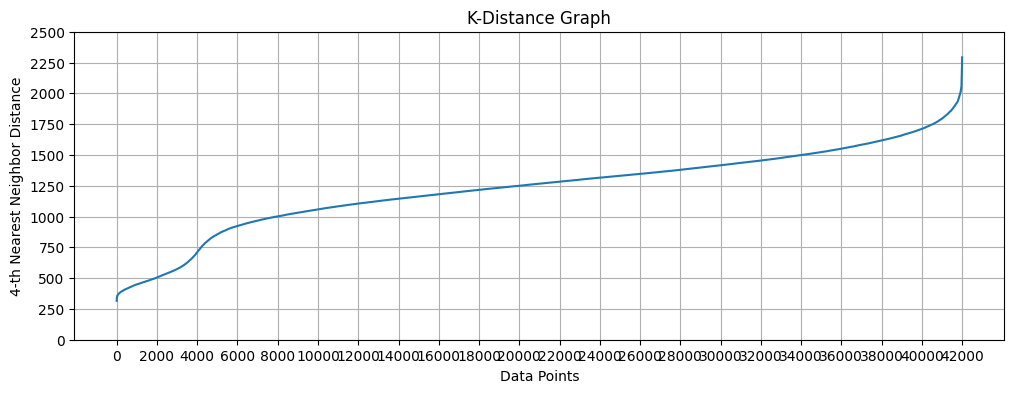

In [84]:
plt.figure(figsize = (12, 4))
plt.plot(kth_distances)
plt.xlabel("Data Points")
plt.ylabel(f"{min_samples-1}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph")
plt.grid(True)
plt.yticks(np.arange(0, 2501, 250))
plt.xticks(np.arange(0, 42001, 2000))
plt.show()

In [85]:
epsilon = kth_distances[2000]
epsilon

504.82769337666093

In [86]:
dbscan = DBSCAN(eps = epsilon, min_samples = 5, n_jobs = -1)
labels = pd.Series(dbscan.fit_predict(X))
labels.value_counts()

-1     39326
 0      2618
 2         9
 3         7
 5         6
 1         6
 10        5
 9         5
 4         5
 6         5
 8         4
 7         4
Name: count, dtype: int64

In [87]:
k_means = KMeans(n_clusters = 10)
labels = pd.Series(k_means.fit_predict(X))
labels.value_counts()

e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


6    6460
4    5336
0    4948
9    4206
7    4194
1    4110
2    3555
5    3453
3    2955
8    2783
Name: count, dtype: int64

In [88]:
X["cluster"] = labels
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [89]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [101]:
pca = PCA(n_components = 50)
X_decomposed = pd.DataFrame(pca.fit_transform(X), columns = pca.get_feature_names_out())
X_decomposed

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49
0,-661.595780,-699.311328,183.282040,120.611394,-81.081811,489.461886,-683.470838,85.559386,348.548052,202.978545,...,104.037740,20.031267,42.145143,-39.241166,-207.626756,32.580724,-53.796404,-61.399965,-68.143941,63.308567
1,1701.451685,-360.551556,-501.805594,335.423656,-442.378932,738.404049,653.875437,-176.600676,-7.520171,67.846271,...,11.954360,6.424134,11.175971,-49.575485,-107.274357,-47.350545,-33.411764,-148.981730,115.084419,-17.136367
2,-886.894434,-293.765782,67.155310,78.263763,-473.715921,-323.540638,437.799098,-305.377741,-195.295502,-25.626019,...,159.428556,30.520675,79.737290,109.447782,33.708702,133.542746,6.671892,-14.305158,-69.211346,-39.240832
3,-165.755602,300.182761,-64.145485,759.706261,-425.844379,157.390337,-304.099139,276.408980,-45.867219,-295.477573,...,-62.001723,139.061694,53.024140,156.529322,205.605434,266.317258,197.916445,86.635650,-19.894248,2.091024
4,1923.709716,-449.153069,-548.613023,188.555147,-651.736273,990.063824,564.507042,-255.915214,124.914697,177.566833,...,122.585208,-80.422504,51.297566,-45.143554,-112.588791,56.418893,19.928011,-29.824077,3.406445,111.371718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,760.355279,-249.854220,-406.991832,-322.864160,-1005.138838,556.384088,-272.098766,-633.014057,-164.416797,291.636347,...,204.084582,19.992241,142.009374,-41.831416,1.470947,30.462693,91.827217,159.015344,-10.584765,-153.975260
41996,-1059.873183,-302.292351,2.941098,38.667116,-360.053230,-150.786339,330.310067,-211.569836,118.315498,85.909736,...,93.425552,-91.242378,-11.500708,3.290225,-202.825514,-85.697484,-10.502179,114.598346,-40.885901,-30.433264
41997,336.269982,950.015280,-168.605414,-692.680963,-539.363843,29.198814,500.287810,653.349427,86.530017,102.243293,...,149.052448,-44.635187,-156.920635,-91.127625,146.013326,-5.063684,15.468533,-2.865978,-43.245694,-42.650168
41998,327.399392,62.016089,697.536401,482.810439,-154.813778,-897.986231,402.210720,-114.409084,-163.944802,-130.402487,...,-151.360190,67.096575,-218.245896,-0.975914,-217.969626,-52.039309,1.015586,62.963343,87.379334,-105.720079


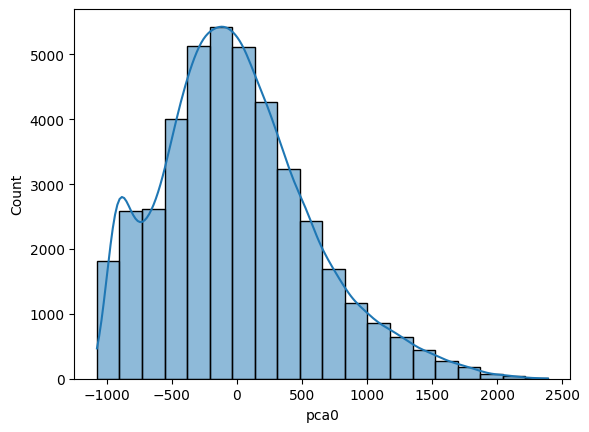

In [108]:
sns.histplot(data = X_decomposed, x = "pca0", kde = True, bins = 20);

In [109]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_decomposed), columns = scaler.feature_names_in_)
X_scaled

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49
0,-0.822066,-0.824935,0.259746,0.198591,-0.164956,0.901845,-1.425155,0.279148,0.844744,0.500236,...,0.620971,0.124958,0.256575,-0.259490,-1.342549,0.226472,-0.371111,-0.433158,-0.476372,0.465323
1,2.378504,-0.372733,-0.802106,0.570045,-0.817111,1.368837,1.427553,-0.356024,0.018347,0.147190,...,0.067747,0.039535,0.053442,-0.328339,-0.684704,-0.308070,-0.230406,-1.063012,0.819539,-0.123993
2,-1.127216,-0.283582,0.079755,0.125363,-0.873676,-0.623270,0.966639,-0.668030,-0.417460,-0.097016,...,0.953750,0.190809,0.503149,0.731100,0.239488,0.901658,0.046272,-0.094471,-0.483921,-0.285924
3,-0.150488,0.509265,-0.123754,1.303717,-0.787266,0.278911,-0.615913,0.741546,-0.070652,-0.802029,...,-0.376570,0.872207,0.327932,1.044765,1.366331,1.789590,1.366342,0.631456,-0.135119,0.016861
4,2.679536,-0.491005,-0.874655,0.316080,-1.195009,1.840927,1.236921,-0.548190,0.325715,0.433845,...,0.732401,-0.505670,0.316608,-0.298813,-0.719542,0.385891,0.137773,-0.206077,0.029679,0.817419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.103860,-0.224966,-0.655149,-0.568269,-1.832914,1.027385,-0.547652,-1.461841,-0.345793,0.731863,...,1.222037,0.124713,0.911605,-0.276747,0.028159,0.212308,0.634059,1.151983,-0.069276,-1.126435
41996,-1.361503,-0.294964,-0.019773,0.056893,-0.668510,-0.299200,0.737353,-0.440749,0.310399,0.194382,...,0.557214,-0.573595,-0.095299,0.023861,-1.311075,-0.564515,-0.072272,0.832553,-0.283585,-0.221403
41997,0.529468,1.376710,-0.285662,-1.207758,-0.992173,0.038435,1.099934,1.654813,0.236628,0.237055,...,0.891412,-0.281005,-1.049138,-0.605167,0.975684,-0.025275,0.106991,-0.012204,-0.300275,-0.310900
41998,0.517454,0.191342,1.056815,0.824907,-0.298045,-1.700875,0.890725,-0.205344,-0.344698,-0.370754,...,-0.913422,0.420425,-1.451383,-0.004561,-1.410350,-0.339426,0.007230,0.461214,0.623591,-0.772932


In [112]:
estimator = KNeighborsClassifier()
params = {
    "n_neighbors": [5, 6, 7],
    "algorithm": ["kd_tree"],
    "p": [1, 2, np.inf]
}

searcher = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = params,
    n_jobs = -1,
    n_iter = 9,
    cv = 5,
    refit = True,
    verbose = 3
)

searcher.fit(X_scaled, y)

print("Best parameters: ", searcher.best_params_)
print("Best score: ", searcher.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters:  {'p': 1, 'n_neighbors': 5, 'algorithm': 'kd_tree'}
Best score:  0.9601428571428571


In [113]:
import pickle

In [114]:
with open("./models/knn_model.pickle", "wb") as file:
    pickle.dump(searcher.best_estimator_, file)